In [28]:
import os
mypath=os.getcwd()


In [29]:
import csv
import pandas as pd
sourcefile=(f"{mypath}\\stocklist.csv")
#data=pd.read_csv(sourcefile, header=None, index_col=0, squeeze=True).to_dict()
data = pd.read_csv(sourcefile) 
# Preview the first 5 lines of the loaded data 
stocklist=data['Symbol']
name1=data['Name']
price1=data['HistoryPrice']
sector1=data['Sector']
industry1=data['Industry']
volumeOwned1=data['VolumeOwned']

data


,Symbol,Name,HistoryPrice,MarketCap,Sector,Industry,VolumeOwned
0,C31.SI,Capital Land,14.075,104722236.6,Consumer Non-Durables,Shoe Manufacturing,1000
1,S58.SI,S,4.100,1000.0,Health Care,Medical/Dental Instruments,2000
2,AAPL,Apple,7.750,184094259.5,Public Utilities,Water Supply,3000


In [30]:
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError
from yahoo_finance import Share
import yahoo_finance
from datetime import datetime
#import sys, json
import pandas as pd    
import requests
from bs4 import BeautifulSoup
import sys

def get_html_data(url: str ) -> str:
    resp = requests.get(url)
    htmldata = resp.text
    return htmldata

def get_url_data(txt1='',txt2='', txt3=''):
    urldata0=(soup.find_all(txt1, txt2))
    urldataIndex1=len(str(txt2))+3+len(txt3)
    urldata=(str(urldata0)[urldataIndex1:-8])
    return urldata


i=0
symbol_data = None
symbol_data92={}
while i < len(stocklist):
    share1=stocklist[i]
    my_share = share.Share(share1)
    try:
        symbol_data = my_share.get_historical(share.PERIOD_TYPE_DAY,3,
                                              share.FREQUENCY_TYPE_MINUTE,90)
    except YahooFinanceError as e:
        print(e.message)
        sys.exit(1)
    index1=len(symbol_data)-1
    name2=name1[i]
    price2=price1[i]
    sector2=sector1[i]
    industry2=industry1[i]
    volumeOwned2=volumeOwned1[i]

    timestamp1=int(str(symbol_data['timestamp'][index1])[0:10])
    timestamp2=datetime.fromtimestamp(timestamp1)
    timestamp3=timestamp2.strftime('%d %b %Y %H:%M')
    open1=symbol_data['open'][index1]
    close1=symbol_data['close'][index1]
    high1=symbol_data['high'][index1]
    low1=symbol_data['low'][index1]
    vol1=symbol_data['volume'][index1]

    url=f"https://sg.finance.yahoo.com/quote/{share1}/history?p={share1}"
    resp  = requests.get(url)
    resp_text = resp.text
    soup = BeautifulSoup(resp_text, "html.parser")


    urltle0=soup.find_all("title")
    urltleIndex1=str(urltle0).find(share1)-1
    urltle1=str(urltle0)[8:urltleIndex1]

    urlcur1=get_url_data("span",{"data-reactid": '28'},'Currency in')
    urldate1=get_url_data("span",{"data-reactid": '52'},'')
    urlopen1=get_url_data("span",{"data-reactid": '53'},'')
    urlhigh1=get_url_data("span",{"data-reactid": '55'},'')
    urllow1=get_url_data("span",{"data-reactid": '57'},'')
    urlclose1=get_url_data("span",{"data-reactid": '59'},'')
    urlaClose1=get_url_data("span",{"data-reactid": '61'},'')
    urlvol1=get_url_data("span",{"data-reactid": '63'},'')

    data = {(i+1):{'symbol':share1,'name':name2,'histprice':price2,
                    'sector':sector2,'industry':industry2,
                    'volumeOwned':volumeOwned2,
                    'api timestamp':timestamp3,'api open':open1,'api close':close1,'api volume':vol1,
                    'url cur':urlcur1,'url title':urltle1,'url date':urldate1,
                    'url open':urlopen1,'url high':urlhigh1,"url low":urllow1,
                    'url close':urlclose1,'url adj close':urlaClose1,
                    'url volume':urlvol1}}

    symbol_data92.update(data)
    i=i+1


In [31]:
symbol_data92_df = pd.DataFrame.from_dict(symbol_data92, orient="index")
symbol_data92_df.to_csv(f"{mypath}\\data.csv")


In [32]:
outfile=f"{mypath}\\data.csv"
pd.read_csv(outfile) 


,Unnamed: 0,symbol,name,histprice,sector,industry,volumeOwned,api timestamp,api open,api close,api volume,url cur,url title,url date,url open,url high,url low,url close,url adj close,url volume
0,1,C31.SI,Capital Land,14.075,Consumer Non-Durables,Shoe Manufacturing,1000,02 Oct 2019 16:30,3.51,3.50,1022100,SGD,CapitaLand,NaN,3.50,3.52,3.49,3.48,3.48,"2,970,200"
1,2,S58.SI,S,4.100,Health Care,Medical/Dental Instruments,2000,02 Oct 2019 16:30,4.81,4.82,280300,SGD,SATS,NaN,4.82,4.83,4.79,4.80,4.80,"923,700"
2,3,AAPL,Apple,7.750,Public Utilities,Water Supply,3000,02 Oct 2019 04:00,224.58,225.00,0,USD,Apple Inc.,NaN,225.64,225.89,223.89,224.90,224.90,"7,021,215"


In [33]:
import numpy as np
import matplotlib.pyplot as plt
def plot_chart(share2):
    my_share_ana = share.Share(share2)
    symbol_data2 = my_share_ana.get_historical(share.PERIOD_TYPE_YEAR,1,
                                                  share.FREQUENCY_TYPE_WEEK,1)
    i=0
    timestamp_list=symbol_data2['timestamp']
    while i < len(symbol_data2['timestamp']):
        timestamp1=int(str(symbol_data2['timestamp'][i])[0:10])
        timestamp2=datetime.fromtimestamp(timestamp1)
        timestamp_list[i]=timestamp2.strftime('%Y%b%d')
        i=i+1
    y1l = symbol_data2['close'][:]
    y2l = symbol_data2['low'][:]
    y3l = symbol_data2['high'][:]
    y4l = symbol_data2['open'][:]
    xl = (timestamp_list[:])
    labels = timestamp_list[:]

    df=pd.DataFrame({'timestamp': xl, 'close': y1l, 
                     'low': y2l, 'high': y3l, 'open': y4l })
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(10, 5)
    plt.plot( 'timestamp', 'close', data=df, marker='o', 
             markerfacecolor='blue', markersize=4, 
             color='blue', linewidth=1)
    plt.plot( 'timestamp', 'high', data=df, marker='*', 
             color='olive', linewidth=1, linestyle='dashed')
    plt.plot( 'timestamp', 'low', data=df, marker='x', 
             color='green', linewidth=1, linestyle='dashed')
    plt.plot( 'timestamp', 'open', data=df, marker='+', 
             color='orange', linewidth=1)
    plt.xticks(rotation=90)
    fig.suptitle(f'{share2}" historical open price trend"', fontsize=12)    
    plt.legend()
    plotchart = plt.show()
    return plotchart



Symbol for analysis: IBM


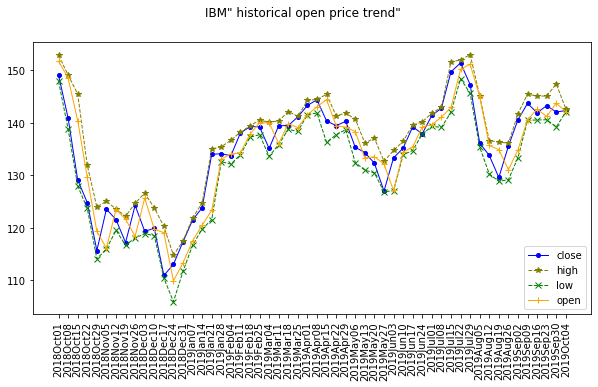

In [34]:
import matplotlib
share2=input("Symbol for analysis: ")
plot_chart(share2)

In [ ]:
type(my_share)